# Assignment 2

# Data Wrangling - II
1. Scan all variables for missing values and inconsistencies. If
there are missing values and/or inconsistencies, use any of
the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers,
use any of the suitable techniques to deal with them.
3. Apply data transformations on at least one of the variables.
The purpose of this transformation should be one of the
following reasons: 
    - to change the scale for better understanding of the variable, 
    - to convert a non-linear relation into a linear one, 
    - or to decrease the skewness and convert the distribution into a normal distribution.
Reason and document your approach properly.

In [506]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

In [507]:
# dataset_path = "/home/TE/Documents/31311_DSBDAL/Assignment2/"
os.listdir()

['StudentsPerformance.csv', 'universities.csv', 'assignment2.ipynb']

In [508]:
# df = pd.read_csv(dataset_path+"universities.csv")
df = pd.read_csv('universities.csv')
df.head()
uni_data = df

In [509]:
df.sample(10)

,University Name,Program Name,City,Duration,Cost of Tuition (USD),Median Salary After Placement (USD),Application Deadline
8,Georgia Institute of Technology,MS in Computer Science,Atlanta,2 years,43000,120000,December 15
18,University of California,MS in Bioengineering,Irvine,2 years,47000,125000,January 1
58,University of Denver,MS in Robotics,Denver,2 years,46000,130000,December 1
64,University of Montana,MS in Robotics,Missoula,2 years,46000,125000,December 15
119,Purdue University,MS in Data Science,West Lafayette,2 years,47000,120000,January 1
91,University of California,MS in Statistics,San Francisco,2 years,46000,120000,December 1
146,Stanford University,MS in Applied Physics,Stanford,2 years,53000,140000,January 1
136,University of Southern California,MS in Computer Science,Los Angeles,2 years,49000,130000,December 1
105,Northwestern University,MS in Data Science,Evanston,2 years,47000,120000,December 1
9,Harvard University,MS in Engineering Sciences,Cambridge,2 years,57000,140000,January 1


## Cleaning and Preprocessing Data
- Here we clean the `df['Duration]` column by converting it to numerical form
- There were some entries where the data was in ranges i.e., 2-5.1 years. For that I have simply taken the mean of those entries

In [510]:
duration_years:list[float] = []
ctr : int = 0
for x in df['Duration']:
    if x[3] != '-' and x[1] != '-' and x[2] != '-' and x[4] != '-':
        duration_years.append(float(x[-6::-1]))
    else:
        p,q = map(float, x[-6::-1].split("-"))
        duration_years.append((p+q)/2)
        ctr += 1
print(f"{ctr} records were modified.")

2 records were modified.


In [511]:
print(duration_years)
len(duration_years)

[2.0, 2.0, 2.0, 3.55, 2.0, 1.5, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 5.1, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 5.1, 2.0, 2.0, 2.0, 2.0, 5.1, 2.0, 2.0, 2.0, 2.0, 5.1, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]


198

### Sucess !
**The final shape of the column matches the length of `duration_years` list.**<br>
**Now we will replace `Duration` with `duration_years`** 

In [512]:
df['Duration'].shape


(198,)

In [513]:
df['Duration'] = duration_years
df.head()

,University Name,Program Name,City,Duration,Cost of Tuition (USD),Median Salary After Placement (USD),Application Deadline
0,Stanford University,MS in Computer Science,Stanford,2.00,54000,150000,December 15
1,Massachusetts Institute of Technology (MIT),NaN,Cambridge,2.00,53000,145000,December 15
2,University of California,MS in Computer Science,Berkeley,2.00,45000,140000,December 15
3,Carnegie Mellon University,MS in Robotics,Pittsburgh,3.55,50000,130000,December 1
4,University of Illinois Urbana-Champaign,MS in Computer Science,Urbana,2.00,46000,125000,January 1


In [514]:
df['Program Name'].dtype

dtype('O')

## Handling Null Values

In [515]:
df.isnull().sum()

University Name                         0
Program Name                           10
City                                    0
Duration                                0
Cost of Tuition (USD)                   0
Median Salary After Placement (USD)     0
Application Deadline                    0
dtype: int64

## Null Values Found ! 
**Looks like the `Program Name` column is the only one with null values**<br>
**We will replace the `Program Name` which is `null` with the `Program Name` of the previous college**

In [516]:
df.fillna({'Program Name':0}, inplace=True)

In [517]:
prev : str = ""
ctr : int = 0
uniName : list[str] = []
for x in df['Program Name']:
    if x == 0:
        uniName.append(prev)
        ctr += 1
    else:
        uniName.append(x)
    prev = x
print(len(uniName))
print(f"{ctr} records were modified")
df['Program Name'] = uniName 
print(df['Program Name'].values)

198
10 records were modified
['MS in Computer Science' 'MS in Computer Science'
 'MS in Computer Science' 'MS in Robotics' 'MS in Computer Science'
 'MS in Data Science' 'MS in Applied Physics' 'MS in Applied Physics'
 'MS in Computer Science' 'MS in Engineering Sciences' 'MS in Robotics'
 'MS in Data Science' 'MS in Computer Science' 'MS in Computer Science'
 'MS in Mechanical Engineering' 'MS in Artificial Intelligence'
 'MS in Statistics' 'MS in Bioengineering' 'MS in Bioengineering'
 'MS in Bioengineering' 'MS in Computer Science'
 'MS in Mechanical Engineering' 'MS in Robotics'
 'MS in Chemical Engineering' 'MS in Chemical Engineering'
 'MS in Data Science' 'MS in Computer Science' 'MS in Applied Physics'
 'MS in Computer Science' 'MS in Robotics' 'MS in Robotics'
 'MS in Data Science' 'MS in Mechanical Engineering'
 'MS in Chemical Engineering' 'MS in Statistics' 'MS in Robotics'
 'MS in Computer Science' 'MS in Applied Physics' 'MS in Data Science'
 'MS in Mechanical Engineering

In [518]:
city_to_state = {
    "Stanford": "CA",
    "Cambridge": "MA",
    "Berkeley": "CA",
    "Pittsburgh": "PA",
    "Urbana": "IL",
    "Seattle": "WA",
    "Pasadena": "CA",
    "Ann Arbor": "MI",
    "Atlanta": "GA",
    "Los Angeles": "CA",
    "Princeton": "NJ",
    "Austin": "TX",
    "Madison": "WI",
    "Ithaca": "NY",
    "Chicago": "IL",
    "San Diego": "CA",
    "Irvine": "CA",
    "Durham": "NC",
    "College Park": "MD",
    "Philadelphia": "PA",
    "Evanston": "IL",
    "Santa Barbara": "CA",
    "Chapel Hill": "NC",
    "Providence": "RI",
    "Minneapolis": "MN",
    "Santa Cruz": "CA",
    "San Francisco" : "CA",
    "College Station": "TX",
    "West Lafayette": "IN",
    "Bloomington": "IN",
    "Tucson": "AZ",
    "Boulder": "CO",
    "Storrs": "CT",
    "East Lansing": "MI",
    "Salt Lake City": "UT",
    "Coral Gables": "FL",
    "Norman": "OK",
    "Lawrence": "KS",
    "Tampa": "FL",
    "Columbus": "OH",
    "Lubbock": "TX",
    "Newark": "NJ",
    "Lincoln": "NE",
    "Lexington": "KY",
    "Tallahassee": "FL",
    "Columbia": "MO",
    "Milwaukee": "WI",
    "Burlington": "VT",
    "Kingston": "RI",
    "Grand Forks": "ND",
    "Moscow": "ID",
    "Fargo": "ND",
    "Albuquerque": "NM",
    "Denver": "CO",
    "Laramie": "WY",
    "Lafayette": "LA",
    "Fairbanks": "AK",
    "Honolulu": "HI",
    "Oxford": "OH",
    "Missoula": "MT",
    "Fayetteville": "AR",
    "Cedar Falls": "IA",
    "Tulsa": "OK",
    "Akron": "OH",
    "Kansas City": "MO",
    "Orlando": "FL",
    "Gainesville" : "FL",
    "Athens" : "AL"
}

def get_state_code(city_name)->str:
    state_code = city_to_state.get(city_name)
    if state_code:
        return state_code
    else:
        KeyError("City Not Found")
        return None
states : list[str] = []
# null_ctr : list[str] = []
for x in df['City']:
    state = get_state_code(x)
    if state:
        states.append(state)
    else:
        states.append(0)
        # null_ctr.append(x)


In [519]:
df['State'] = states

## Assignment Starts from here

In [520]:
df.describe()

,Duration,Cost of Tuition (USD),Median Salary After Placement (USD)
count,198.000000,198.000000,198.000000
mean,2.067929,48671.717172,126550.505051
std,0.451612,2806.502254,7823.884734
min,1.500000,43000.000000,115000.000000
25%,2.000000,47000.000000,120000.000000
50%,2.000000,48000.000000,125000.000000
75%,2.000000,50750.000000,130000.000000
max,5.100000,57000.000000,150000.000000


In [521]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   University Name                      198 non-null    object 
 1   Program Name                         198 non-null    object 
 2   City                                 198 non-null    object 
 3   Duration                             198 non-null    float64
 4   Cost of Tuition (USD)                198 non-null    int64  
 5   Median Salary After Placement (USD)  198 non-null    int64  
 6   Application Deadline                 198 non-null    object 
 7   State                                198 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 12.5+ KB


In [522]:
df.dtypes

University Name                         object
Program Name                            object
City                                    object
Duration                               float64
Cost of Tuition (USD)                    int64
Median Salary After Placement (USD)      int64
Application Deadline                    object
State                                   object
dtype: object

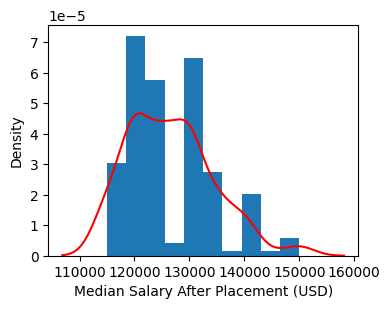

In [523]:
plt.figure(figsize=(4,3))
plt.hist(df['Median Salary After Placement (USD)'], density=True)
sns.kdeplot(df['Median Salary After Placement (USD)'], color='r')
plt.show()

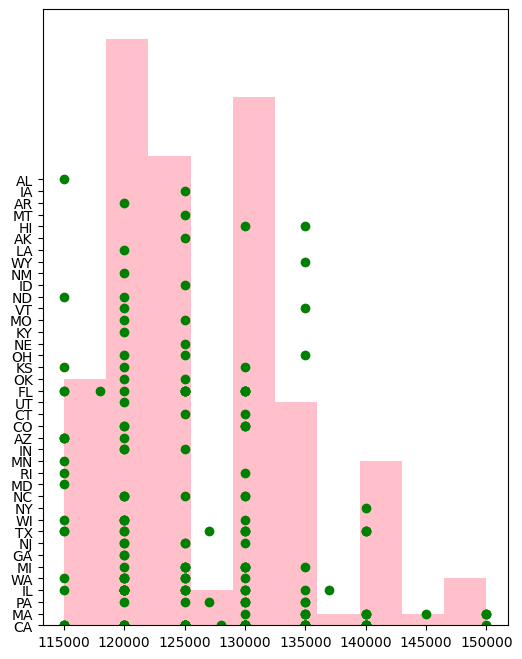

In [524]:
plt.figure(figsize=(6, 8))
plt.hist(df["Median Salary After Placement (USD)"], color='pink')
plt.scatter(df['Median Salary After Placement (USD)'], df['State'], c=['green'])
plt.show()

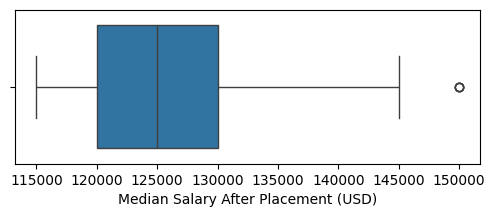

In [525]:
plt.figure(figsize=(6,2))
sns.boxplot(df['Median Salary After Placement (USD)'], orient='h')
plt.show()

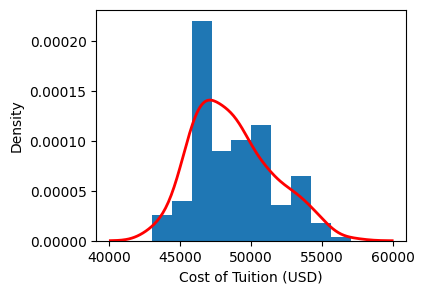

In [526]:
plt.figure(figsize=(4,3))
plt.hist(df['Cost of Tuition (USD)'], density=True)
sns.kdeplot(df['Cost of Tuition (USD)'], linewidth = 2, color='r')
plt.show()

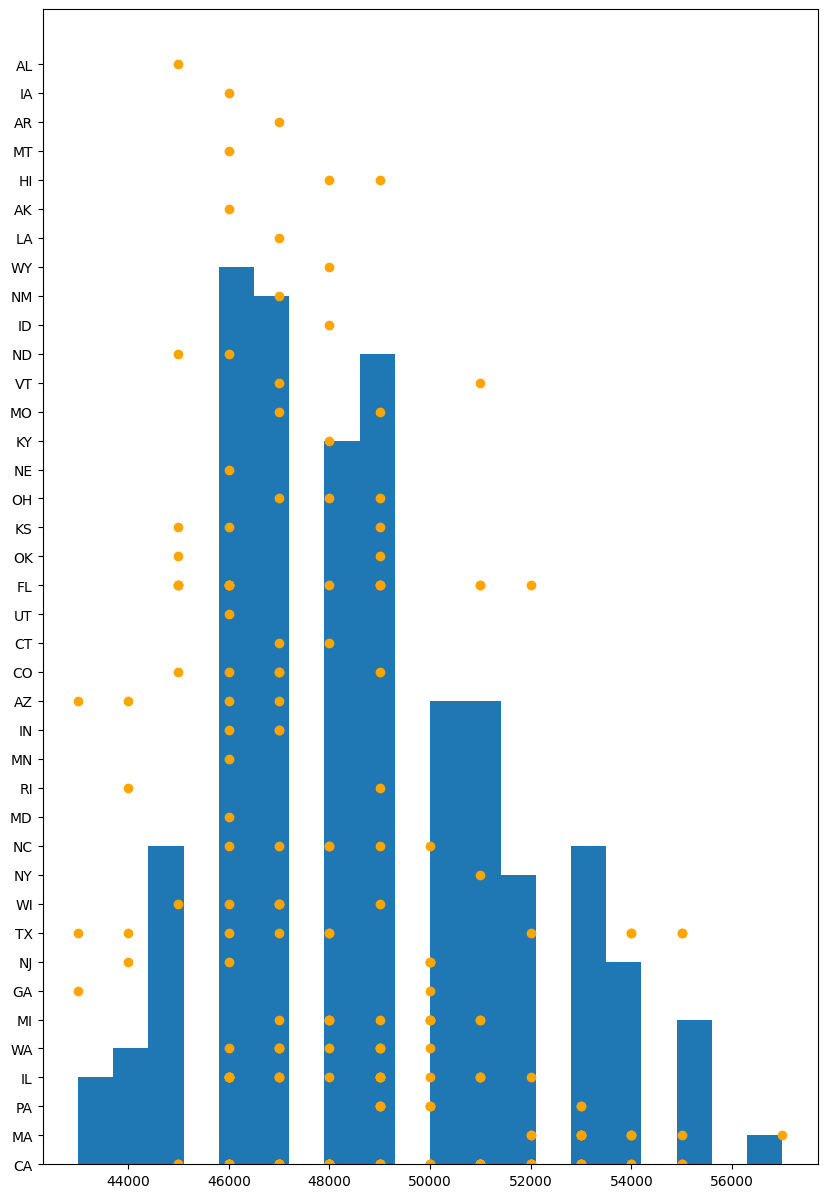

In [527]:
plt.figure(figsize=(10, 15))
plt.hist(df['Cost of Tuition (USD)'], bins=20)
plt.scatter(df['Cost of Tuition (USD)'], df['State'], c=['orange'])
plt.show()

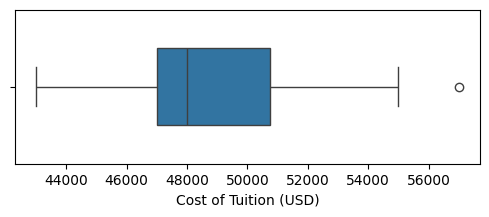

In [528]:
plt.figure(figsize=(6,2))
sns.boxplot(df['Cost of Tuition (USD)'], orient='h', width= 0.5)
plt.show()

### Defining the numeric columns separately

In [529]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
print(numeric_columns)

Index(['Duration', 'Cost of Tuition (USD)',
       'Median Salary After Placement (USD)'],
      dtype='object')


## Z-Score Normalisation
- We will now perform Z-score normalisation over the `Median Salaray after placement field`

In [530]:
data_sample = df['Median Salary After Placement (USD)'].values
data_sample[:5]

array([150000, 145000, 140000, 130000, 125000])

In [531]:
def Z_score_norm(data_sample : np.array):
    data_mean = data_sample.mean()
    data_std = data_sample.std()
    print(f'Mean : {data_mean}\nStandard Deviation : {data_std}')
    z_Score = []
    for x in data_sample:
        z_Score.append((x - data_mean) / data_std)

    return np.array(z_Score)

In [532]:
z_Score = Z_score_norm(data_sample)
z_Score[:20]

Mean : 126550.50505050505
Standard Deviation : 7804.102440155379


array([ 3.00476514,  2.36407647,  1.7233878 ,  0.44201047, -0.1986782 ,
       -0.83936687,  1.08269913,  0.44201047, -0.83936687,  1.7233878 ,
       -0.1986782 ,  0.44201047,  0.05759726, -1.48005554,  1.7233878 ,
        1.08269913, -0.83936687,  0.185735  , -0.1986782 ,  0.44201047])

### Here we are detecting outliers using the Z-Score Method

In [533]:
def get_Outliers(normalised_sample : np.array):
    outliers = []
    for i, x in enumerate(normalised_sample):
        if x >= 3 or x <= -3:
            outliers.append(i)
    return np.array(outliers)

outliers = get_Outliers(z_Score)
print(outliers)

[  0 126 142 184]


In [534]:
for col in numeric_columns:
    print(f'{"="*80}\n{col}')
    outliers = get_Outliers(Z_score_norm(df[col].values))
    if len(outliers):
        print(f"Outliers found!\n{outliers}")
        for x in outliers:
            print('-'*80)
            print(df.loc[x])

Duration
Mean : 2.067929292929293
Standard Deviation : 0.4504702986324459
Outliers found!
[ 3 12 20 25 30]
--------------------------------------------------------------------------------
University Name                        Carnegie Mellon University
Program Name                                       MS in Robotics
City                                                   Pittsburgh
Duration                                                     3.55
Cost of Tuition (USD)                                       50000
Median Salary After Placement (USD)                        130000
Application Deadline                                   December 1
State                                                          PA
Name: 3, dtype: object
--------------------------------------------------------------------------------
University Name                        University of Texas at Austin
Program Name                                  MS in Computer Science
City                                      

### Using the IQR Method
**Now we will be using the `IQR` method to find outliers in this dataframe**

In [535]:
outliers = []
for col in numeric_columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr 
    outliers.append(df[(df[col] < lower_bound) | (df[col] > upper_bound)])
    print("="*80, f"\n\n{col}\n")
    print(f'Outliers Found!: {len(outliers)}')



Duration

Outliers Found!: 1

Cost of Tuition (USD)

Outliers Found!: 2

Median Salary After Placement (USD)

Outliers Found!: 3


In [536]:
print(f"Skewness before handling outliers: {df['Median Salary After Placement (USD)'].skew()}")

Skewness before handling outliers: 0.6501658609735123


### It seems that the IQR method is much more sensitive to Outliers than the Z-Score method

**Now we will remove the outliers**

In [537]:
for col in numeric_columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr 
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
print(f"Skewness after handling outliers (Median Salary After Placement (USD)): {df['Median Salary After Placement (USD)'].skew()}")
print(f"Skewness after handling outliers (Cost of Tuition (USD)): {df['Cost of Tuition (USD)'].skew()}")

Skewness after handling outliers (Median Salary After Placement (USD)): 0.3369769829123553
Skewness after handling outliers (Cost of Tuition (USD)): 0.5046072346269462


## Transformations
**We will now use transformations to further reduce the skewness of the dataset**

In [538]:
target_col = numeric_columns[1]  # Example: Select the first numeric column
print(f"Before Transformation - Skewness of {target_col}:", df[target_col].skew())

Before Transformation - Skewness of Cost of Tuition (USD): 0.5046072346269462


In [539]:

# Applying a log transformation to reduce skewness
df[f"{target_col}_log"] = np.log1p(df[target_col])
print(f"After Transformation - Skewness of {target_col}_log:", df[f"{target_col}_log"].skew())


After Transformation - Skewness of Cost of Tuition (USD)_log: 0.3735638370709448


In [540]:
df[f'{target_col}_log'].describe()

count    188.000000
mean      10.789515
std        0.056143
min       10.668979
25%       10.736418
50%       10.778977
75%       10.819798
max       10.950824
Name: Cost of Tuition (USD)_log, dtype: float64

In [541]:
df[f"{target_col}_log"] = np.log1p(df[f'{target_col}_log'])
print(f"After Transformation - Skewness of {target_col}_log:", df[f"{target_col}_log"].skew())

After Transformation - Skewness of Cost of Tuition (USD)_log: 0.36249687293898086


In [542]:
df[f'{target_col}_log'].head()

1    2.474694
2    2.460822
4    2.462697
6    2.477807
7    2.468065
Name: Cost of Tuition (USD)_log, dtype: float64

In [543]:
df[f'{target_col}_log'].describe()

count    188.000000
mean       2.467199
std        0.004758
min        2.456934
25%        2.462697
50%        2.466316
75%        2.469776
max        2.480800
Name: Cost of Tuition (USD)_log, dtype: float64

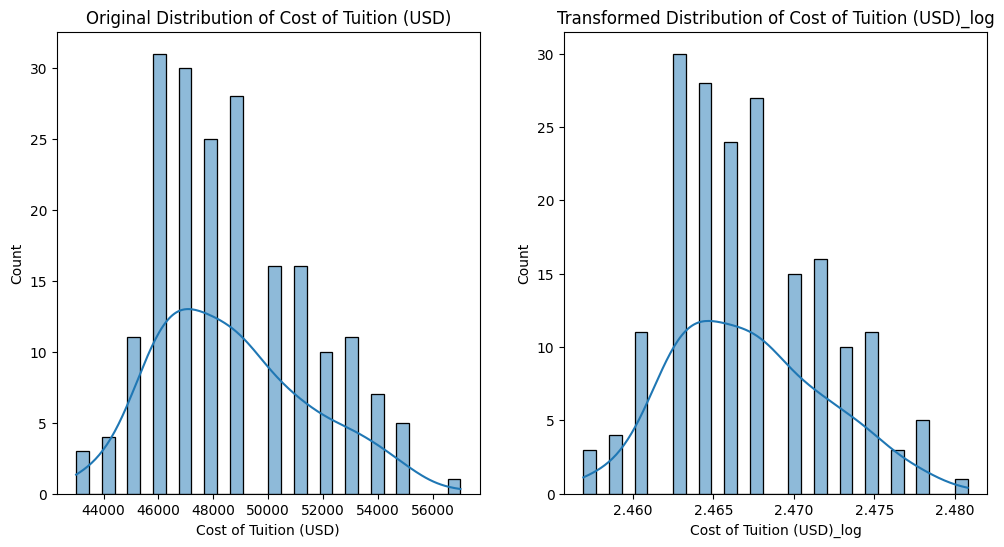

In [544]:

# Visualize the transformation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(uni_data[target_col], kde=True, bins=30)
plt.title(f"Original Distribution of {target_col}")

plt.subplot(1, 2, 2)
sns.histplot(df[f"{target_col}_log"], kde=True, bins=30)
plt.title(f"Transformed Distribution of {target_col}_log")
plt.show()

## Using Box-Cox Transformation

In [545]:
from sklearn.preprocessing import PowerTransformer


In [546]:

# Ensure the column has all positive values (Box-Cox requires positive data)
if (df[target_col] <= 0).any():
    min_value = df[target_col].min()
    shift_value = abs(min_value) + 1  # Shift df to make all values positive
    df[target_col] = df[target_col] + shift_value
    print(f"Shifted {target_col} by {shift_value} to make all values positive.")

# Check skewness before transformation
print(f"Before Transformation - Skewness of {target_col}:", df[target_col].skew())


Before Transformation - Skewness of Cost of Tuition (USD): 0.5046072346269462


In [547]:

# Apply Box-Cox transformation using PowerTransformer
pt = PowerTransformer(method='box-cox', standardize=False)
df[f"{target_col}_bc"] = pt.fit_transform(df[[target_col]])

# Check skewness after transformation
print(f"After Transformation - Skewness of {target_col}_bc:", df[f"{target_col}_bc"].skew())


After Transformation - Skewness of Cost of Tuition (USD)_bc: 0.0


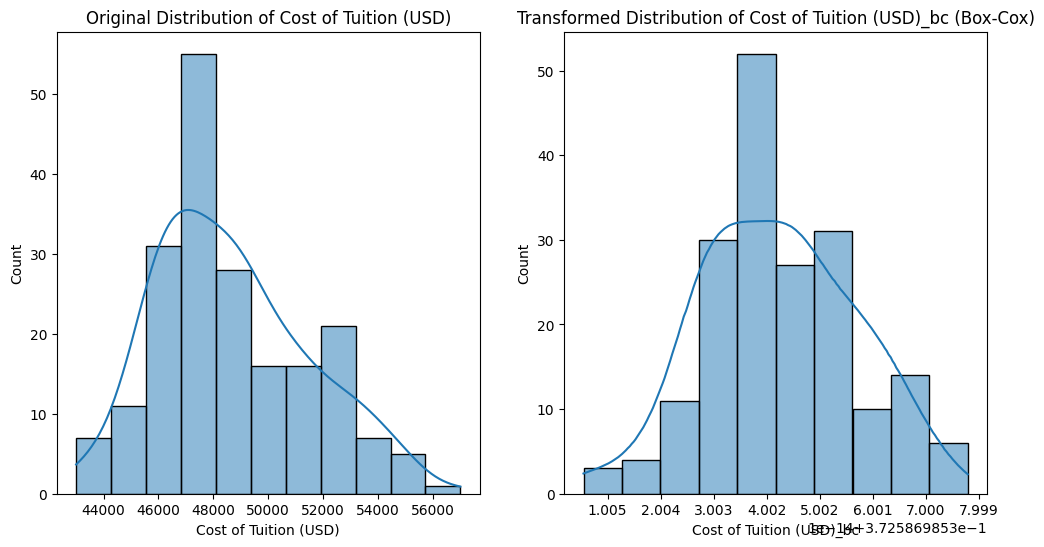

In [548]:

# Visualize the original and transformed distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(uni_data[target_col], kde=True)
plt.title(f"Original Distribution of {target_col}")

plt.subplot(1, 2, 2)
sns.histplot(df[f"{target_col}_bc"], kde=True)
plt.title(f"Transformed Distribution of {target_col}_bc (Box-Cox)")
plt.show()


## Outliers from given sample

In [549]:
test_sample = [32, 33, 40, 65, 69, 76, 77, 79, 81, 83, 89, 90, 96, 99]
test_sample = pd.DataFrame(test_sample)
test_sample.head(2)

,0
0,32
1,33


In [550]:
Q1 = test_sample.quantile(0.25)
Q3 = test_sample.quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR 
upper = Q3 + 1.5 * IQR 
test_sample_outliers = test_sample[(test_sample < lower) | (test_sample > upper)]
test_sample_outliers = [x for x in test_sample_outliers[0] if x.is_integer()]

print(test_sample_outliers)
print(f'Lower Bound Limit: {lower}\nUpper Bound Limit: {upper}')


# sample.drop

[32.0, 33.0]
Lower Bound Limit: 0    33.75
dtype: float64
Upper Bound Limit: 0    119.75
dtype: float64
